# Plots for the 2MDM analysis

In [1]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib.patches as mpatches
from collections import OrderedDict
import seaborn as sns
from scipy.interpolate import LinearNDInterpolator,interp2d, griddata
from itertools import product
from IPython.display import display, Markdown

pd.option_context('display.max_columns', -1)

pd.options.mode.chained_assignment = None #Disable copy warnings
# plt.style.use('fivethirtyeight') #Set style
# mpl.rcParams.update({'figure.figsize' : (15,10)})  #Set general plotting options
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.colormaps['RdYlBu']

### Load Relic Density scan 

In [18]:
relicData = np.genfromtxt('../maddm_2MDM_scan/output/scan_run_01.txt',comments='#',usecols=(1,2,3),names=['mDM','mZp','Omegah2'])

In [36]:
atlasCurve = np.array(list(zip([112.70553064275038, 178.77428998505232, 268.16143497757844, 342.0029895366218, 423.61733931240656, 509.118086696562, 563.5276532137518, 617.9372197309417, 680.1195814648729, 726.7563527653214, 788.9387144992526, 847.2346786248131, 1053.2137518684603, 1173.6920777279522, 1282.5112107623318, 1402.9895366218236, 1573.9910313901344, 1752.7653213751867, 1915.9940209267563, 2129.745889387145],[4.267425320056899, 19.203413940256045, 46.941678520625885, 72.54623044096728, 108.81934566145091, 136.55761024182075, 155.7610241820768, 174.96443812233284, 181.3655761024182, 204.83641536273115, 226.17354196301562, 258.17923186344234, 358.4637268847795, 422.47510668563297, 477.95163584637265, 535.5618776671407, 612.375533428165, 695.5903271692745, 772.4039829302986, 872.6884779516357])))

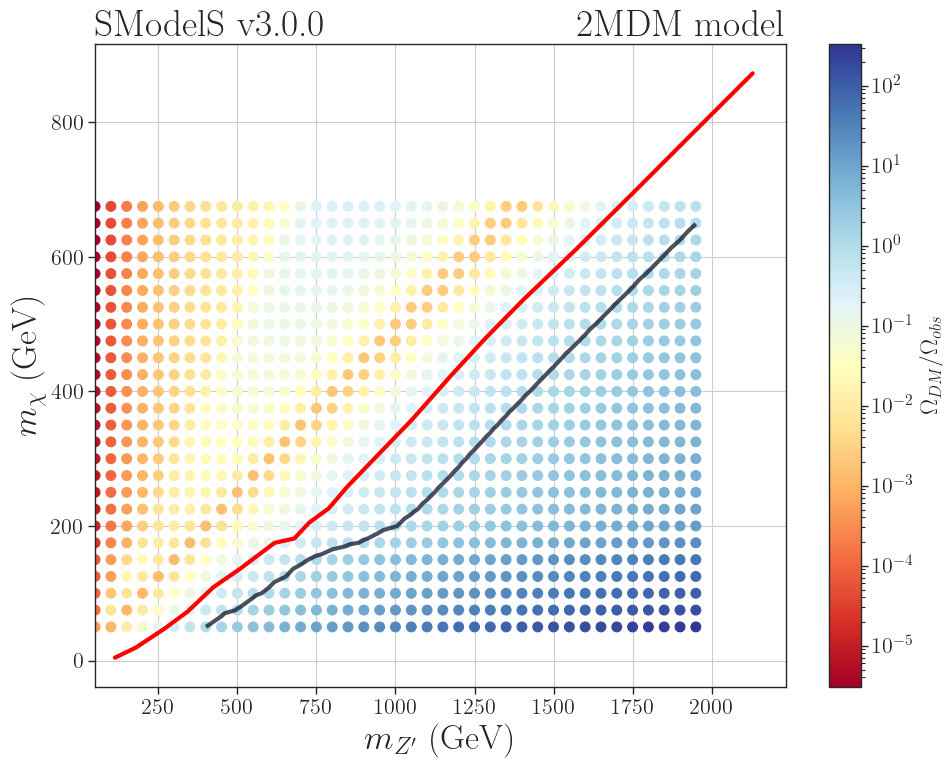

In [38]:
plt.figure(figsize=(10,8))


plt.scatter(relicData['mZp'],relicData['mDM'],c=relicData['Omegah2']/0.12,s=50,
            cmap=cm, norm=LogNorm())
cb = plt.colorbar(label=r'$\Omega_{DM}/\Omega_{obs}$')

pts = np.array([y for y in product(np.unique(relicData['mZp']),np.unique(relicData['mDM']))])
rPts = griddata(list(zip(relicData['mZp'],relicData['mDM'])),relicData['Omegah2'],pts)
plt.tricontour(pts[:,0],pts[:,1], rPts, levels=[0.12], alpha=0.7,linewidths=3)

plt.plot(atlasCurve[:,0],atlasCurve[:,1],color='red',linewidth=3)

# plt.ylim(0,1000)
# plt.xlim(0,2500)
    
plt.xlabel(r'$m_{Z^\prime}$ (GeV)', fontsize=25)
plt.ylabel(r'$m_{\chi}$ (GeV)', fontsize=25)
    
plt.title(r'SModelS v3.0.0', loc='left', fontsize=27)
plt.title(r'2MDM model', loc='right', fontsize=27)

plt.grid()
plt.tight_layout()

plt.show()